Generates All the Stats for all the models:

In [20]:
import matplotlib.pyplot as plt
# import seaborn as sns
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

mlp_cmatrix = [[255, 3, 89, 201, 140, 199, 71], [39, 3, 12, 18, 10, 22, 7], [135, 0, 164, 188, 167, 227, 143], [135, 0, 62, 1130, 185, 177, 85], [107, 1, 88, 236, 489, 208, 104], [168, 0, 90, 253, 257, 401, 78], [46, 0, 86, 97, 69, 53, 480]]
rnn_cmatrix = [[81, 0, 78, 294, 192, 225, 88], [6, 1, 9, 32, 31, 25, 7], [66, 1, 146, 256, 202, 221, 132], [43, 0, 80, 1204, 160, 217, 70], [41, 1, 65, 297, 515, 261, 53], [55, 0, 89, 302, 293, 447, 61], [29, 1, 72, 124, 64, 78, 463]]
cnn_cmatrix = [[480, 17, 140, 72, 92, 144, 33], [17, 63, 11, 4, 3, 11, 2], [119, 10, 454, 75, 85, 182, 99], [103, 3, 113, 1298, 104, 103, 50], [147, 10, 165, 128, 527, 219, 37], [161, 12, 193, 111, 168, 569, 33], [29, 3, 92, 44, 30, 30, 603]]
resnet_cmatrix = [[598, 13, 84, 37, 84, 122, 20], [25, 71, 4, 4, 1, 5, 1], [124, 6, 512, 26, 109, 162, 85], [30, 1, 20, 1570, 87, 32, 34], [81, 0, 64, 81, 796, 184, 27], [121, 5, 156, 58, 194, 692, 21], [15, 0, 59, 36, 15, 12, 694]]

# plt.figure(figsize=(10, 8))
# sns.heatmap(mlp_cmatrix, annot=True, fmt='d', cmap='Blues', 
#             xticklabels=classes, 
#             yticklabels=classes)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.tight_layout()
# plt.savefig('mlp_confusion_matrix.png')
# plt.show()

    

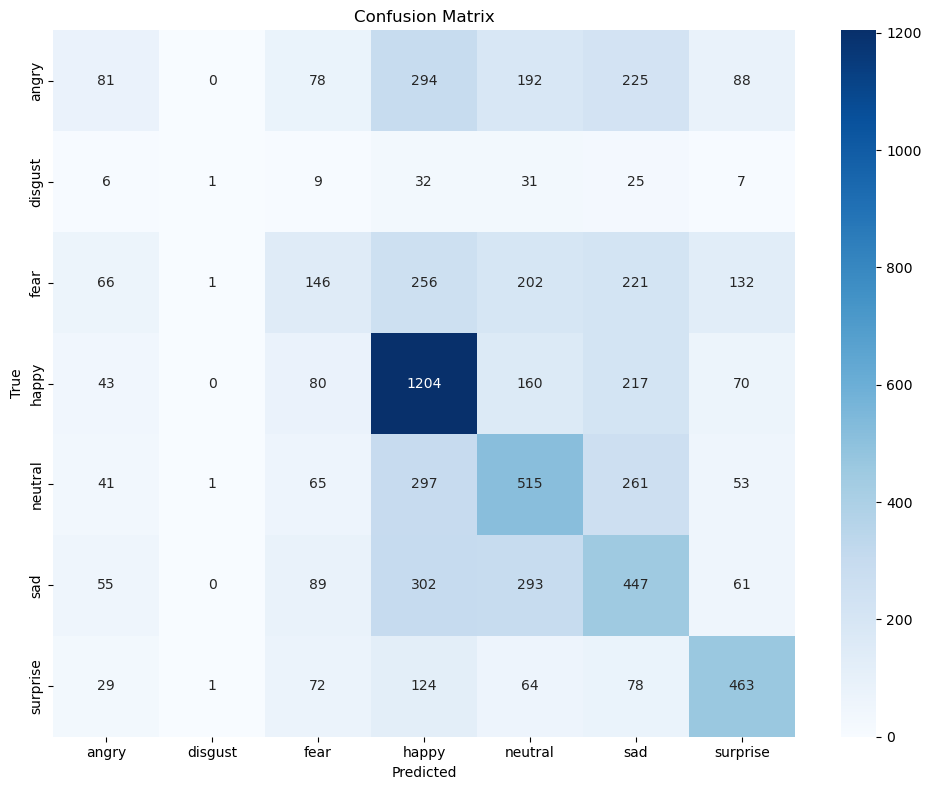

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(rnn_cmatrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, 
            yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('rnn_confusion_matrix.png')
plt.show()

In [3]:
def precision(cmatrix, labels):
    stats = {}
    for lab in range(len(labels)):
        c_tp = cmatrix[lab][lab]
        fp = 0
        for cf in range(len(labels)):
            if cf == lab:
                continue
            fp += cmatrix[cf][lab]
        stats[labels[lab]] = (c_tp) / (c_tp + fp)
    return stats

In [4]:
# rnn_precision = precision(rnn_cmatrix, classes)
cnn_precision = precision(cnn_cmatrix, classes)

In [5]:
# mlp_precision = precision(mlp_cmatrix, classes)
resnet_precision= precision(resnet_cmatrix, classes)

In [6]:
def recall(cmatrix, labels):
    stats = {}
    for lab in range(len(labels)):
        c_tp = cmatrix[lab][lab]
        fn = 0
        for cf in range(len(labels)):
            if cf == lab:
                continue
            fn += cmatrix[lab][cf]
        stats[labels[lab]] = (c_tp) / (c_tp + fn)
    return stats

In [7]:
# rnn_recall = recall(rnn_cmatrix, classes)
cnn_recall = recall(cnn_cmatrix, classes)

In [8]:
# mlp_recall = recall(mlp_cmatrix, classes)
resnet_recall = recall(resnet_cmatrix, classes)

In [9]:
def f1_score(cmatrix, labels):
    f1_stats = {}
    p_stats = precision(cmatrix, labels)
    r_stats = recall(cmatrix, labels)

    for label in labels:
        f1_stats[label] = (p_stats[label] * r_stats[label]) / (p_stats[label] + r_stats[label]) 
    return f1_stats


In [14]:
# rnn_f1 = f1_score(rnn_cmatrix, classes)
cnn_f1 = f1_score(cnn_cmatrix, classes)

In [10]:
# mlp_f1 = f1_score(mlp_cmatrix, classes)
resnet_f1 = f1_score(resnet_cmatrix, classes)

In [11]:
def accuracy(cmatrix, labels):
    correct_predictions = 0
    for c in range(len(labels)):
        correct_predictions += cmatrix[c][c]
    incorrect_predictions = 0
    for i in range(len(labels)):
        for j in range(len(labels)):
            if i == j:
                continue
            incorrect_predictions += cmatrix[i][j]
    return correct_predictions / (correct_predictions + incorrect_predictions)   

In [21]:
rnn_acc = accuracy(rnn_cmatrix, classes)
cnn_acc = accuracy(cnn_cmatrix, classes)
print(f"RNN accuracy: {rnn_acc}")
print(f"CNN accuracy: {cnn_acc}")
# print(cnn_acc)

RNN accuracy: 0.3980217330732795
CNN accuracy: 0.5548763545429286
0.5548763545429286


In [22]:
mlp_acc = accuracy(mlp_cmatrix, classes)
resnet_acc = accuracy(resnet_cmatrix, classes)
print(f"MLP accuracy: {mlp_acc}")
print(f"ResNet accuracy: {resnet_acc}")

MLP accuracy: 0.40707718027305656
ResNet accuracy: 0.6872387851769295


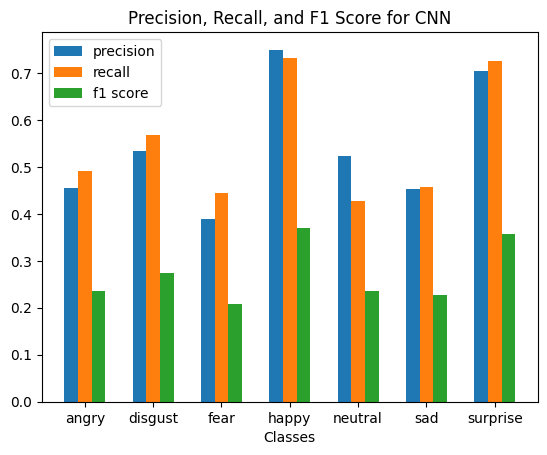

In [15]:
import numpy as np
width = 0.2
x = np.arange(len(classes))
plt.bar(x - width, cnn_precision.values(), width, label='precision')
plt.bar(x, cnn_recall.values(), width, label='recall')
plt.bar(x + width, cnn_f1.values(), width, label='f1 score')
plt.xlabel("Classes")
plt.xticks(x, classes)
plt.legend()
plt.title('Precision, Recall, and F1 Score for CNN')
plt.savefig('best_cnn_metrics.png')
plt.show()

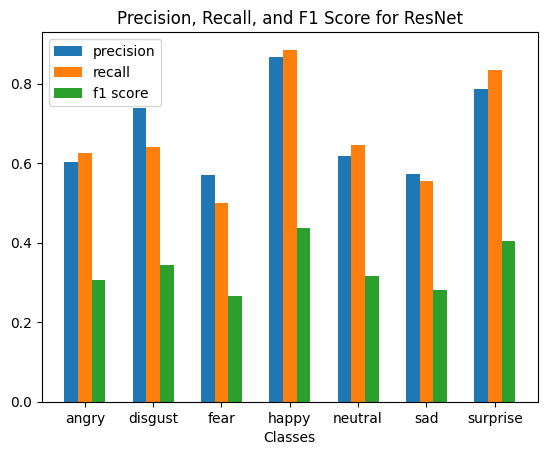

In [16]:
import numpy as np
width = 0.2
x = np.arange(len(classes))
plt.bar(x - width, resnet_precision.values(), width, label='precision')
plt.bar(x, resnet_recall.values(), width, label='recall')
plt.bar(x + width, resnet_f1.values(), width, label='f1 score')
plt.xlabel("Classes")
plt.xticks(x, classes)
plt.legend()
plt.title('Precision, Recall, and F1 Score for ResNet')
plt.savefig('best_resnet_metrics.png')
plt.show()